## **Model Selection and Bulding**

In this notebook I'll be selecting and building some machine learning models for the dataset that we previously got from the exploratory analysis notebook. 

---

In [14]:
import pandas as pd

In [15]:
# Loading the dataframe from our pipeline and exploratory analysis

df = pd.read_parquet("datasets/3c_like_proteinase_molecular_descriptors.parquet")

In [16]:
display(df)

,molecule_chembl_id,canonical_smiles,bioactivity_class,MW,LogP,NumHDonors,NumHAcceptors,pIC50,morgan_fp_0,morgan_fp_1,...,morgan_fp_1014,morgan_fp_1015,morgan_fp_1016,morgan_fp_1017,morgan_fp_1018,morgan_fp_1019,morgan_fp_1020,morgan_fp_1021,morgan_fp_1022,morgan_fp_1023
0,CHEMBL187579,Cc1noc(C)c1CN1C(=O)C(=O)c2cc(C#N)ccc21,intermediate,281.271,1.89262,0,5,5.142668,0,0,...,0,0,0,0,0,0,0,0,0,0
1,CHEMBL188487,O=C1C(=O)N(Cc2ccc(F)cc2Cl)c2ccc(I)cc21,intermediate,415.589,3.81320,0,2,5.026872,0,0,...,0,0,0,0,0,0,0,0,0,0
2,CHEMBL185698,O=C1C(=O)N(CC2COc3ccccc3O2)c2ccc(I)cc21,inactive,421.190,2.66050,0,4,4.869666,0,0,...,0,0,0,0,0,1,0,0,0,0
3,CHEMBL426082,O=C1C(=O)N(Cc2cc3ccccc3s2)c2ccccc21,inactive,293.347,3.63080,0,3,4.882397,0,0,...,0,0,0,0,0,0,0,0,0,0
4,CHEMBL187717,O=C1C(=O)N(Cc2cc3ccccc3s2)c2c1cccc2[N+](=O)[O-],intermediate,338.344,3.53900,0,5,5.698970,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
128,CHEMBL2146517,COC(=O)[C@@]1(C)CCCc2c1ccc1c2C(=O)C(=O)c2c(C)c...,inactive,338.359,3.40102,0,5,4.974694,0,0,...,0,0,0,0,0,0,0,0,0,0
129,CHEMBL187460,C[C@H]1COC2=C1C(=O)C(=O)c1c2ccc2c1CCCC2(C)C,inactive,296.366,3.44330,0,3,4.995679,0,0,...,0,0,0,0,0,1,0,0,0,0
130,CHEMBL363535,Cc1coc2c1C(=O)C(=O)c1c-2ccc2c(C)cccc12,inactive,276.291,4.09564,0,3,4.939302,0,0,...,0,0,0,0,0,0,0,0,0,0
131,CHEMBL227075,Cc1cccc2c3c(ccc12)C1=C(C(=O)C3=O)[C@@H](C)CO1,inactive,278.307,3.29102,0,3,4.970616,0,0,...,0,0,0,0,0,1,0,0,0,0


In [17]:
# Selecting only pIC50 and fingerprints columns
df = df.filter(regex="^(morgan|pIC50)").reset_index()

In [18]:
display(df)

,index,pIC50,morgan_fp_0,morgan_fp_1,morgan_fp_2,morgan_fp_3,morgan_fp_4,morgan_fp_5,morgan_fp_6,morgan_fp_7,...,morgan_fp_1014,morgan_fp_1015,morgan_fp_1016,morgan_fp_1017,morgan_fp_1018,morgan_fp_1019,morgan_fp_1020,morgan_fp_1021,morgan_fp_1022,morgan_fp_1023
0,0,5.142668,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,5.026872,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2,4.869666,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3,3,4.882397,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,5.698970,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
128,128,4.974694,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
129,129,4.995679,0,0,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
130,130,4.939302,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
131,131,4.970616,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [19]:
# Removing low variance features that don't provide much useful information for prediction

X = df.drop("pIC50", axis=1)

from sklearn.feature_selection import VarianceThreshold

selector = VarianceThreshold(threshold= 0.8 * (1 - 0.8))
X_reduced = selector.fit_transform(X)

# Convert X_reduced back to a DataFrame for compatibility with PyCaret
X_reduced = pd.DataFrame(X_reduced)

# Add the target column back to the reduced feature set
df_reduced = pd.concat([X_reduced, df['pIC50']], axis=1)

### **Testing muliple models with PyCaret**

PyCaret is an automated machine learning library that allows us to test multiple machine learning models on our dataset and selects the best one based on the evaluation metric specified in the setup.

One of PyCaret’s advantages is its ability to handle data preprocessing automatically. This includes tasks such as splitting the data into training and testing sets, handling missing values, and removing low variance features, so we don’t need to manually configure these steps.

Since our dataset is small (133 rows) and we are working on a regression problem, we will use an 80%/20% train-test split and employ 5-fold cross-validation to avoid underfitting or overfitting. We will focus on the Root Mean Squared Error (RMSE) score as the metric to select the model that penalizes larger prediction errors more heavily, since we are working with drug discovery.

In [20]:
from pycaret.regression import setup, compare_models

# Initialize PyCaret's setup function
reg = setup(data=df_reduced, target='pIC50', train_size=0.8, fold=5, session_id=333)

# Compare different models and select the best one
best_model = compare_models(sort="RMSE")

,Description,Value
0,Session id,333
1,Target,pIC50
2,Target type,Regression
3,Original data shape,"(133, 47)"
4,Transformed data shape,"(133, 47)"
5,Transformed train set shape,"(106, 47)"
6,Transformed test set shape,"(27, 47)"
7,Numeric features,46
8,Preprocess,True
9,Imputation type,simple


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
rf,Random Forest Regressor,0.3417,0.2054,0.4452,0.7190,0.0770,0.0736,0.0520
gbr,Gradient Boosting Regressor,0.3395,0.2311,0.4682,0.6752,0.0794,0.0713,0.0280
ada,AdaBoost Regressor,0.3896,0.2539,0.5004,0.6664,0.0877,0.0851,0.0280
lightgbm,Light Gradient Boosting Machine,0.4214,0.2872,0.5333,0.6208,0.0929,0.0904,0.0240
knn,K Neighbors Regressor,0.4134,0.3249,0.5675,0.5721,0.0959,0.0863,0.0340
br,Bayesian Ridge,0.4681,0.3261,0.5692,0.5834,0.1000,0.1024,0.0100
ridge,Ridge Regression,0.4681,0.3487,0.5879,0.5528,0.1037,0.1018,0.7120
dt,Decision Tree Regressor,0.4322,0.4129,0.6167,0.4251,0.1034,0.0877,0.0120
omp,Orthogonal Matching Pursuit,0.4930,0.3923,0.6253,0.4995,0.1066,0.1038,0.0100
et,Extra Trees Regressor,0.4337,0.4985,0.6949,0.3494,0.1183,0.0935,0.0440


## **Interpretation**

The Random Forest Regressor model seems to have the best performance overall, with the lowest RMSE (0.4653), MSE (0.2326), and the highest R² (0.6714), indicating it's the best model in terms of explaining the variance in the data and penalizing wrong predictions.

## **Analyzing Model for Overfitting**

Now that I've tested multiple models, we need to check for overfit. Altought the model had a good performance, as we can see the gap between R² on test and train dataseta is too large. This means that the model is not doing so great to generalize data.

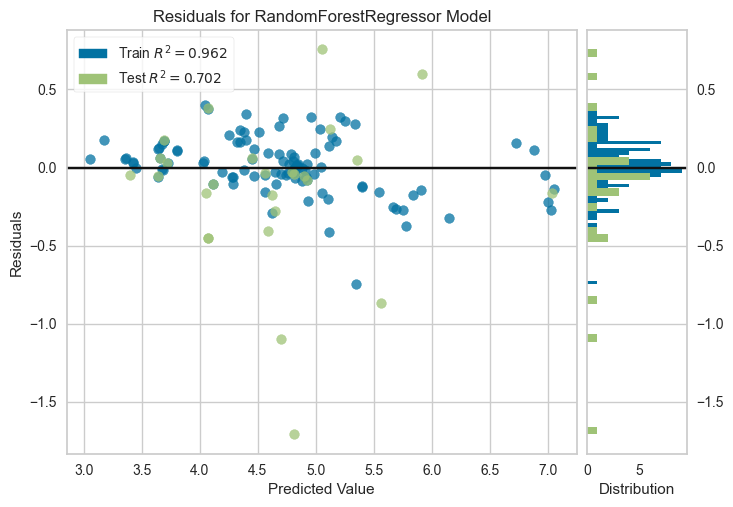

In [21]:
from pycaret.regression import plot_model

plot_model(best_model, plot='residuals')

In [22]:
from pycaret.regression import *

# Get predictions on a test set
predictions = predict_model(best_model)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Random Forest Regressor,0.3168,0.2525,0.5025,0.7016,0.0802,0.0615


## **Model Fine-Tuning and Ensembling**

It's time to fine-tune and boost the model. The goal here is try to get test R² more close to train R², giving the model a more robust generalization capacity.

In [23]:
tuned_model = tune_model(best_model, n_iter=10, optimize="R2", search_library='scikit-optimize', choose_better=False)

Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits


In [24]:
tuned_predictions = predict_model(tuned_model)

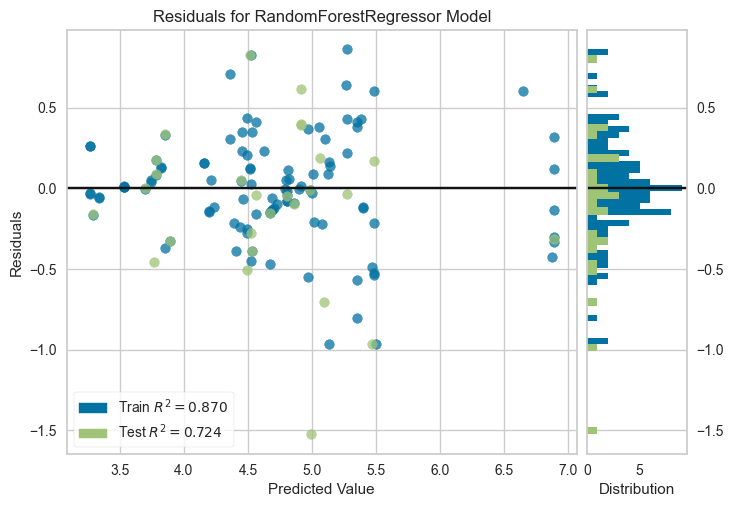

In [25]:
plot_model(tuned_model, plot='residuals')

## **Saving the model**

Now that our model is fine-tuned it's time to save it to use!

In [26]:
from pycaret.regression import save_model

# Save the tuned model to a file
save_model(tuned_model, 'fine_tuned_model')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('numerical_imputer',
                  TransformerWrapper(include=['0', '1', '2', '3', '4', '5', '6',
                                              '7', '8', '9', '10', '11', '12',
                                              '13', '14', '15', '16', '17', '18',
                                              '19', '20', '21', '22', '23', '24',
                                              '25', '26', '27', '28', '29', ...],
                                     transformer=SimpleImputer())),
                 ('categorical_imputer',
                  TransformerWrapper(include=[],
                                     transformer=SimpleImputer(strategy='most_frequent'))),
                 ('trained_model',
                  RandomForestRegressor(bootstrap=False, max_depth=7,
                                        max_features=0.9280575821397051,
                                        min_impurity_decrease=5.75409338254537e-05,
   